In [25]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set up directories for male and female images
male_dir = "/content/male dex"
female_dir = "/content/female dex"

# Preprocessing function to resize and preprocess images
def preprocess(img):
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    return img

# Load male and female images into arrays and preprocess them
male_images = []
for img_file in os.listdir(male_dir):
    img = cv2.imread(os.path.join(male_dir, img_file))
    img = preprocess(img)
    male_images.append(img)

female_images = []
for img_file in os.listdir(female_dir):
    img = cv2.imread(os.path.join(female_dir, img_file))
    img = preprocess(img)
    female_images.append(img)

# Combine male and female images into a single dataset and labels array
X = np.concatenate((male_images, female_images))
y = np.concatenate((np.ones(len(male_images)), np.zeros(len(female_images))))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train SVM model on training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model on testing data and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rename JPG files
for i, filename in enumerate(os.listdir(male_dir)):
    os.rename(os.path.join(male_dir, filename), os.path.join(male_dir, "male_" + str(i) + ".jpg"))
    
for i, filename in enumerate(os.listdir(female_dir)):
    os.rename(os.path.join(female_dir, filename), os.path.join(female_dir, "female_" + str(i) + ".jpg"))


Accuracy: 1.0


In [30]:
from sklearn.metrics import confusion_matrix

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1]]


IndexError: ignored

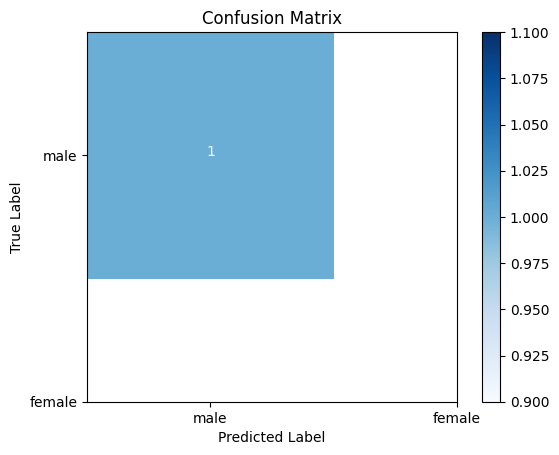

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# define the list of unique class labels
classes = ['male', 'female']

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', 
                 color='white' if cm[i, j] > len(X_test)/2 else 'black')

plt.show()

In [29]:
from sklearn.metrics import classification_report

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a classification report
report = classification_report(y_test, y_pred)

# print the classification report
print(report)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0
